In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#  PART 1: Exploratory Data Analysis (EDA)

## 1.1 Basic dataset overview

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 1.2 Checking for missing values

In [60]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## 1.3 Variable Distributions

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

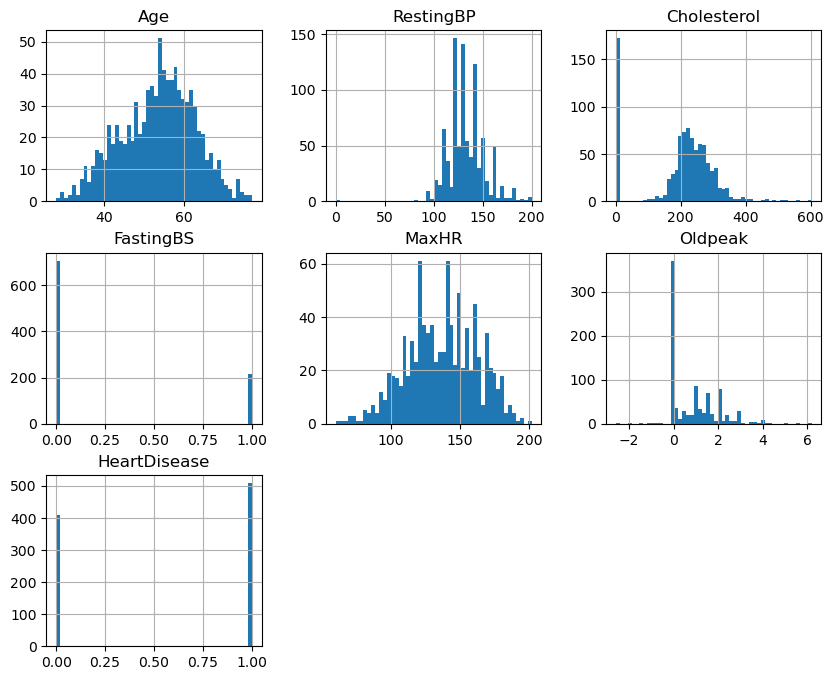

In [63]:
df.hist(bins = 50, figsize = (10,8))

## 1.4 Categorical feature analysis

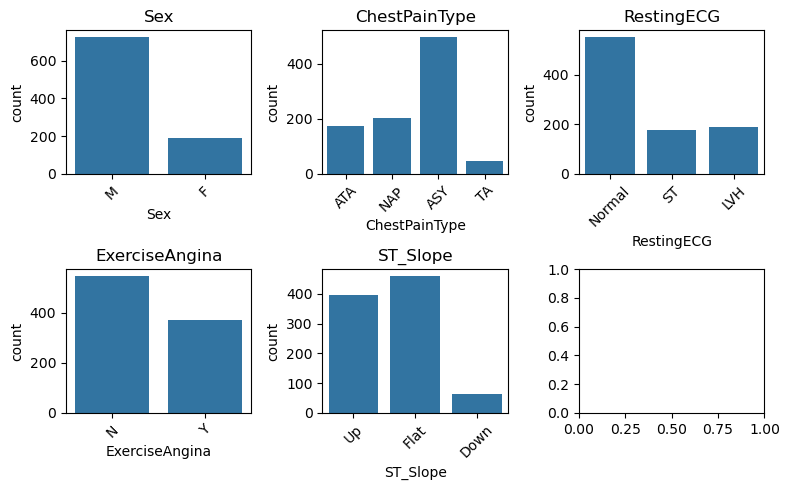

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5)) 
axes = axes.flatten()  

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


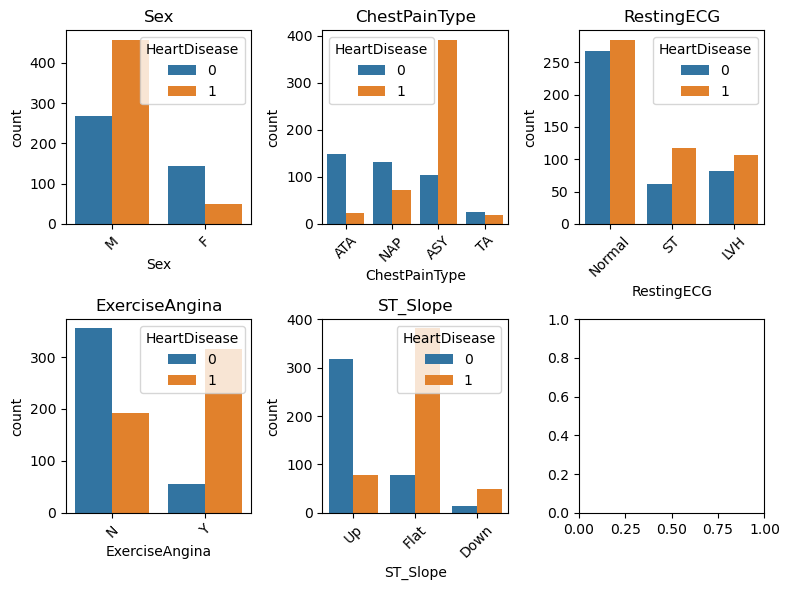

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6)) 
axes = axes.flatten()  

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue= df.HeartDisease , ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 1.5 Checking for Outliers

In [38]:
df.query('Cholesterol == 0')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [43]:
df_clean = df.copy()
df_clean = df_clean[df_clean['RestingBP'] != 0]

In [81]:
df_clean.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.573610,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.385261,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,246.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [88]:
df_clean.query('HeartDisease == 0').Age.describe()

count    410.000000
mean      50.551220
std        9.444915
min       28.000000
25%       43.000000
50%       51.000000
75%       57.000000
max       76.000000
Name: Age, dtype: float64

## 1.6 Numerical features vs target variable

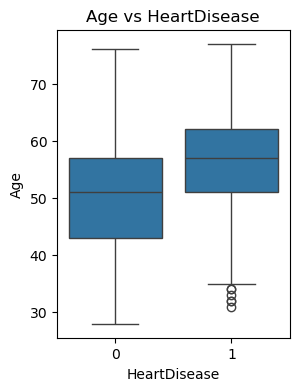

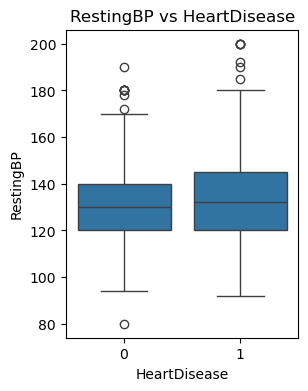

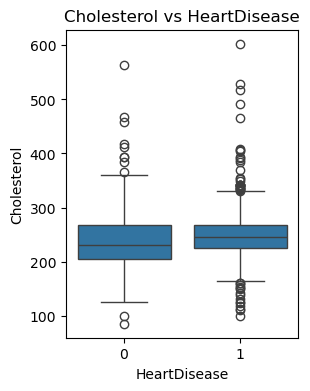

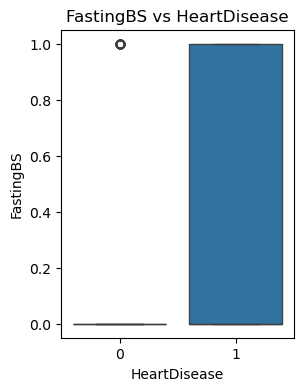

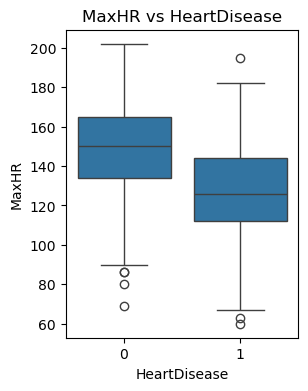

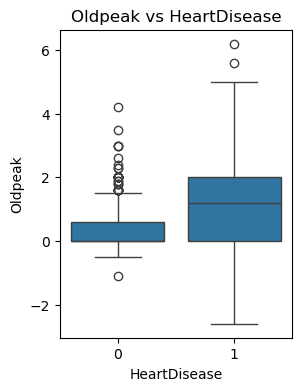

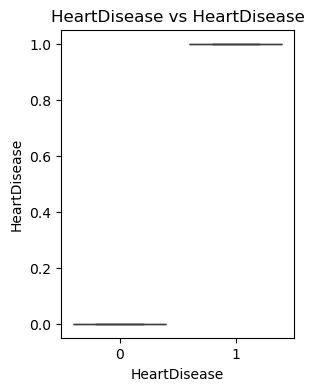

In [80]:
for col in df_clean.select_dtypes(include=np.number):
    plt.figure(figsize=(3, 4))  # większy wykres
    sns.boxplot(data=df_clean, x='HeartDisease', y=col)
    plt.title(f'{col} vs HeartDisease')
    plt.show()


## 1.7 Correlation matrix (including encoded features)

In [103]:
corr = abs(df_encoded.corr())

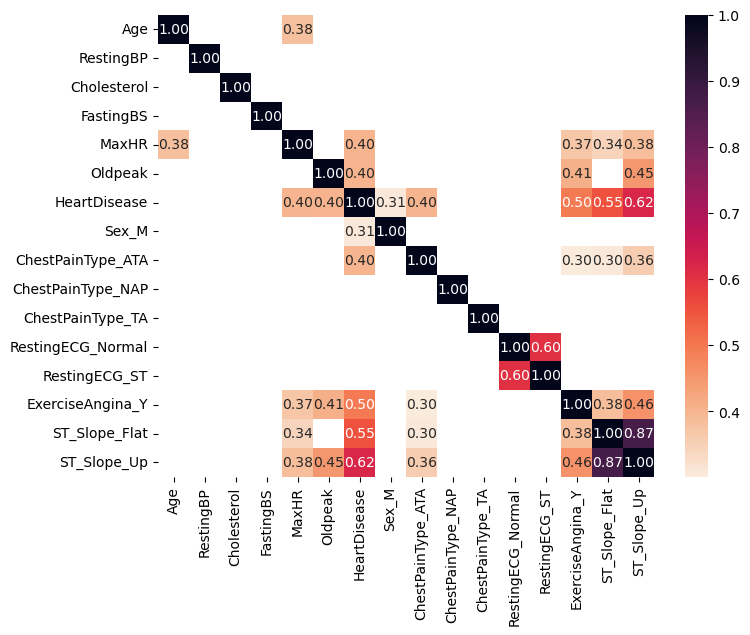

In [108]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)
plt.figure(figsize=(8, 6))
corr = abs(df_encoded.corr())
sns.heatmap(corr[corr>0.3], annot=True, fmt=".2f",  cmap='rocket_r')

plt.show()

# PART 2: Data Preparation and Model Training


## 2.1 Train-test split

In [126]:
from sklearn.model_selection import train_test_split
df_clean.loc[df_clean['Cholesterol']==0, 'Cholesterol'] = np.nan #change outliers values to nan to impute them later
X = df_clean.drop(columns = 'HeartDisease')
y = df_clean['HeartDisease']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify = y, random_state = 42)




## 2.2 Preprocessing: imputation, encoding, scaling

In [142]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
cat_cols = list(X.select_dtypes(include = object).columns)
num_cols = list(X.select_dtypes(include = np.number).columns)


num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(lambda x: x, feature_names_out="one-to-one"),
    StandardScaler())

cat_pipe = make_pipeline(
    OneHotEncoder(drop='first', handle_unknown='ignore'))

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)])

In [145]:
preprocessor.get_feature_names_out()

array(['num__Age', 'num__RestingBP', 'num__Cholesterol', 'num__FastingBS',
       'num__MaxHR', 'num__Oldpeak', 'cat__Sex_M',
       'cat__ChestPainType_ATA', 'cat__ChestPainType_NAP',
       'cat__ChestPainType_TA', 'cat__RestingECG_Normal',
       'cat__RestingECG_ST', 'cat__ExerciseAngina_Y',
       'cat__ST_Slope_Flat', 'cat__ST_Slope_Up'], dtype=object)

In [143]:
import pandas as pd

# Zamiana na DataFrame bez nazw kolumn (tylko podgląd danych)
pd.DataFrame(preprocessor.fit_transform(X)).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.432206,0.414627,0.832639,-0.551733,1.383339,-0.831502,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.478057,1.526360,-1.210238,-0.551733,0.754736,0.106251,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.750256,-0.141240,0.720187,-0.551733,-1.523953,-0.831502,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.584074,0.303453,-0.573010,-0.551733,-1.131075,0.575128,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.052026,0.970493,-0.929108,-0.551733,-0.581047,-0.831502,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## 2.3 Final pipeline with model

In [128]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=42)
model = make_pipeline(preprocessor, 
                     RFC)



## 2.4 Model training


In [130]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

## 2.5 Model evaluation (metrics & confusion matrix)

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[72 10]
 [11 91]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        82
           1       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


Accuracy: 0.8858695652173914
Precision: 0.900990099009901
Recall: 0.8921568627450981
F1-score: 0.896551724137931


In [ ]:
Metryka	Wartość	Co oznacza?
Accuracy	0.886	Model poprawnie przewiduje klasę w ~88.6% przypadków.
Precision	0.901	Z przewidywanych pozytywnych przypadków (np. choroba serca) aż 90.1% to trafienia.
Recall	0.892	Model wykrywa 89.2% wszystkich faktycznych przypadków choroby.
F1-score	0.897	Zrównoważona miara — kompromis między precision a recall.

In [48]:
df_clean.loc[df_clean['Cholesterol']==0, 'Cholesterol'] = np.nan

In [57]:
df_clean['Cholesterol']=df_clean['Cholesterol'].fillna(df_clean.groupby('HeartDisease')['Cholesterol'].transform('median'))

In [58]:
df_clean.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.573610,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.385261,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,246.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df_clean